<a href="https://colab.research.google.com/github/Daniellineto/Atividades_Softex_IA-IOT/blob/main/IA/ATV_3/Atividade_3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade 03 IA - Perceptron**
Aluno: Daniel Lima Neto

### Perceptron

In [ ]:
import numpy as np
class Perceptron:

  def __init__(self, teta, w, n, epochs):

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [ ]:
############ AND

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

############ OR

# 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))

In [ ]:
# Parâmetros do Perceptron
teta = 0
w = [0, 0]
n = 0.1
epochs = 10

# 2) Treinar o AND e depois fazer o predict com a matriz x


In [ ]:
# Dados de entrada e saída para a porta AND
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Criar e treinar o perceptron
p_and = Perceptron(teta=0, w=[0, 0], n=0.1, epochs=10)
p_and.train_perceptron(x, y_and)

# Predição
result_and = p_and.predict_perceptron(x)

print("Saída prevista para AND:", result_and)

Saída prevista para AND: [0, 0, 0, 1]


# 3) Treinar o OR e depois fazer o predict com a matriz x

In [ ]:
# Dados de saída para a porta OR
y_or = np.array([0, 1, 1, 1])

# Criar e treinar o perceptron
p_or = Perceptron(teta=0, w=[0, 0], n=0.1, epochs=10)
p_or.train_perceptron(x, y_or)

# Predição
result_or = p_or.predict_perceptron(x)

print("Saída prevista para OR:", result_or)

Saída prevista para OR: [0, 1, 1, 1]


### Base de Classificação Sintética

In [ ]:
# Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

# 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero)

In [ ]:
# Parâmetros do Perceptron
teta = 0
w = [0, 0]
n = 0.1
epochs = 10

# 5) Treinar o Perceptron

In [ ]:
# Criar e treinar o perceptron com o dataset
p_blob = Perceptron(teta=teta, w=w, n=n, epochs=epochs)
p_blob.train_perceptron(x, y)

# 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"


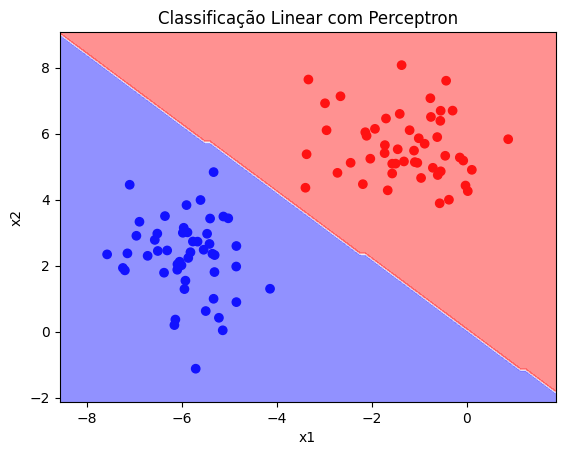

In [ ]:
# Importar biblioteca de plotagem
import matplotlib.pyplot as plt

# Plotar o classificador linear
plot_linear_classifier(x, y, p_blob.w, p_blob.teta)
plt.title("Classificação Linear com Perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [ ]:
from sklearn import metrics


## 7) Fazer o predict do Perceptron usando a matriz x

In [ ]:
# Predição com o perceptron treinado
y_pred = p_blob.predict_perceptron(x)

## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular e exibir a acurácia
acc = accuracy_score(y, y_pred)
print(f"Acurácia do Perceptron: {acc:.2f}")

Acurácia do Perceptron: 1.00


### Dataset Sintético

(-0.1, 1.1)

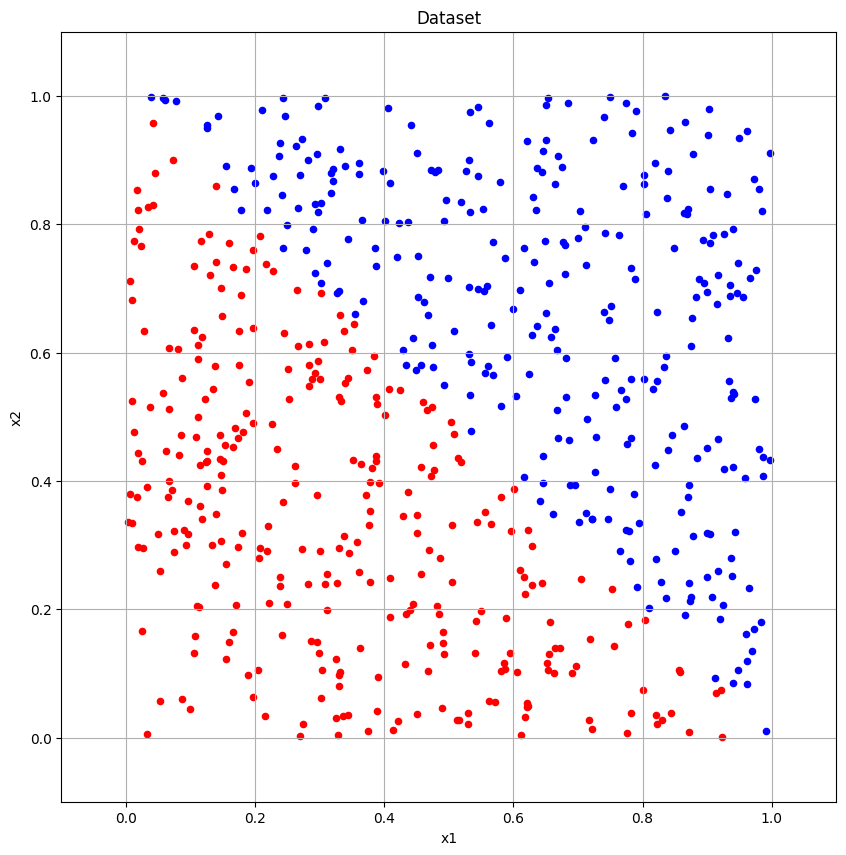

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

# Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [ ]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

# 9) Separar os dados em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Separar os dados em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 10) Inicializar o Perceptron com os parâmetros necessários

In [ ]:
# Parâmetros do Perceptron
teta = 0
w = [0, 0]
n = 0.1
epochs = 10

# Instanciar o Perceptron
p_synthetic = Perceptron(teta=teta, w=w, n=n, epochs=epochs)


## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"

In [ ]:
# Converter os dados de treino e teste para listas
train_x = X_train.values.tolist()
train_y = y_train.values.tolist()

test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

## 12) Treinar o perceptron

In [ ]:
# Treinar o perceptron com os dados de treino
p_synthetic.train_perceptron(train_x, train_y)

## 13) Fazer o predict do Perceptron usando a matriz x

In [ ]:
from sklearn import metrics
# Fazer a predição no conjunto de teste
y_pred = p_synthetic.predict_perceptron(test_x)


## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [ ]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia
acc = accuracy_score(test_y, y_pred)

# Mostrar o resultado
print(f"Acurácia do Perceptron no conjunto de teste: {acc:.2f}")

Acurácia do Perceptron no conjunto de teste: 0.99
